In [43]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Loading data
file_path = Path("Resources/panda_df/books_cleaned_sample3.csv")
df = pd.read_csv(file_path)
df.head()

,average_rating,format,num_pages,publication_year,ratings_count,text_reviews_count,to_read_count,series_binary,author_average_rating,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,3.56,Paperback,288,2010,2,1,9,0,3.735,0,0,0,0,0,0,1,0,0,0
1,4.36,Hardcover,208,2011,37,2,23,1,4.195,1,0,0,1,0,0,0,0,0,0
2,3.60,ebook,352,2011,5,1,2142,1,3.960,1,0,1,1,1,0,0,0,1,1
3,3.77,other,185,1989,397,6,142,1,3.800,0,1,1,1,1,0,0,0,0,1
4,3.76,Paperback,136,2001,98,5,8360,0,3.845,0,0,0,1,1,0,0,0,1,0


In [45]:
# Turn Target variable into bins
df['rating_bin'] = pd.cut(df['average_rating'], bins=[0, 1, 2, 3, 4, 5], labels=[0 ,1, 2, 3, 4], include_lowest=True)
df.head()

,average_rating,format,num_pages,publication_year,ratings_count,text_reviews_count,to_read_count,series_binary,author_average_rating,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,rating_bin
0,3.56,Paperback,288,2010,2,1,9,0,3.735,0,0,0,0,0,0,1,0,0,0,3
1,4.36,Hardcover,208,2011,37,2,23,1,4.195,1,0,0,1,0,0,0,0,0,0,4
2,3.60,ebook,352,2011,5,1,2142,1,3.960,1,0,1,1,1,0,0,0,1,1,3
3,3.77,other,185,1989,397,6,142,1,3.800,0,1,1,1,1,0,0,0,0,1,3
4,3.76,Paperback,136,2001,98,5,8360,0,3.845,0,0,0,1,1,0,0,0,1,0,3


In [46]:
df['rating_bin'].value_counts()

3    35516
4    20919
2     2279
1      221
0      203
Name: rating_bin, dtype: int64

In [47]:
# Drop average_rating column
df = df.drop(columns=['average_rating'])

# Convert categorical data to numeric with `pd.get_dummies`
format_df = pd.get_dummies(df['format'])
format_df.head()

,Hardcover,Paperback,ebook,other
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [48]:
# Merge the two DataFrames together and drop the format column
df = df.merge(format_df, how='left', left_index=True, right_index=True)
df = df.drop(columns=['format'])
df.head()

,num_pages,publication_year,ratings_count,text_reviews_count,to_read_count,series_binary,author_average_rating,children,"comics, graphic","fantasy, paranormal",...,"mystery, thriller, crime",non-fiction,poetry,romance,young-adult,rating_bin,Hardcover,Paperback,ebook,other
0,288,2010,2,1,9,0,3.735,0,0,0,...,0,1,0,0,0,3,0,1,0,0
1,208,2011,37,2,23,1,4.195,1,0,0,...,0,0,0,0,0,4,1,0,0,0
2,352,2011,5,1,2142,1,3.960,1,0,1,...,0,0,0,1,1,3,0,0,1,0
3,185,1989,397,6,142,1,3.800,0,1,1,...,0,0,0,0,1,3,0,0,0,1
4,136,2001,98,5,8360,0,3.845,0,0,0,...,0,0,0,1,0,3,0,1,0,0


In [49]:
# Create the features set (X) and the target vector (y)
X = df.copy()
X = X.drop("rating_bin", axis=1)
y = df["rating_bin"]

In [50]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating a StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


In [52]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,36,2,5,6,2
Actual 1,1,15,19,11,4
Actual 2,2,1,188,347,11
Actual 3,3,0,50,7857,1030
Actual 4,2,0,14,1649,3530


Accuracy Score : 0.7863375042272573
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        51
           1       0.83      0.30      0.44        50
           2       0.68      0.34      0.46       549
           3       0.80      0.88      0.84      8940
           4       0.77      0.68      0.72      5195

    accuracy                           0.79     14785
   macro avg       0.78      0.58      0.64     14785
weighted avg       0.78      0.79      0.78     14785



In [54]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted

[(0.4183625827125867, 'author_average_rating'),
 (0.10904662960756363, 'num_pages'),
 (0.1046074154818468, 'to_read_count'),
 (0.09356333153583136, 'ratings_count'),
 (0.07954768092842829, 'publication_year'),
 (0.060301309615657245, 'text_reviews_count'),
 (0.012127146590693716, 'history, historical fiction, biography'),
 (0.011132688349155139, 'series_binary'),
 (0.010805868538748369, 'fiction'),
 (0.010504664304880798, 'Paperback'),
 (0.010378508655332469, 'non-fiction'),
 (0.009933099343894332, 'romance'),
 (0.009796654905906366, 'fantasy, paranormal'),
 (0.00948971314144027, 'Hardcover'),
 (0.009390919947098198, 'mystery, thriller, crime'),
 (0.008770321502952375, 'children'),
 (0.008548383483112288, 'young-adult'),
 (0.007380172750465561, 'comics, graphic'),
 (0.005789419213845697, 'poetry'),
 (0.005474446434113701, 'ebook'),
 (0.0050490429564466815, 'other')]

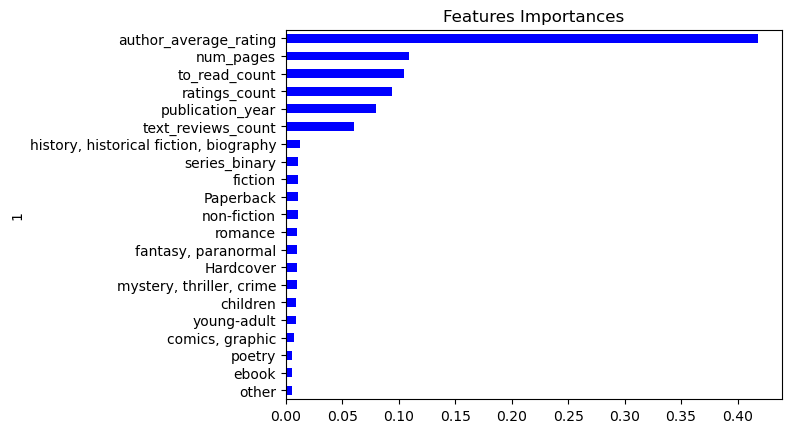

In [55]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)))
importances_df.plot(x=1, y=0, kind='barh', color='blue', legend=None )
plt.title('Features Importances')
plt.show()

## Second Trial when Removeing less important features

In [56]:
# Display df
df.head()

,num_pages,publication_year,ratings_count,text_reviews_count,to_read_count,series_binary,author_average_rating,children,"comics, graphic","fantasy, paranormal",...,"mystery, thriller, crime",non-fiction,poetry,romance,young-adult,rating_bin,Hardcover,Paperback,ebook,other
0,288,2010,2,1,9,0,3.735,0,0,0,...,0,1,0,0,0,3,0,1,0,0
1,208,2011,37,2,23,1,4.195,1,0,0,...,0,0,0,0,0,4,1,0,0,0
2,352,2011,5,1,2142,1,3.960,1,0,1,...,0,0,0,1,1,3,0,0,1,0
3,185,1989,397,6,142,1,3.800,0,1,1,...,0,0,0,0,1,3,0,0,0,1
4,136,2001,98,5,8360,0,3.845,0,0,0,...,0,0,0,1,0,3,0,1,0,0


In [57]:
df.columns

Index(['num_pages', 'publication_year', 'ratings_count', 'text_reviews_count',
       'to_read_count', 'series_binary', 'author_average_rating', 'children',
       'comics, graphic', 'fantasy, paranormal', 'fiction',
       'history, historical fiction, biography', 'mystery, thriller, crime',
       'non-fiction', 'poetry', 'romance', 'young-adult', 'rating_bin',
       'Hardcover', 'Paperback', 'ebook', 'other'],
      dtype='object')

In [64]:
# Drop columns with low importance
high_importance_df = df.drop(columns=['Hardcover', 'Paperback', 'ebook', 'other'])
high_importance_df.head()

,num_pages,publication_year,ratings_count,text_reviews_count,to_read_count,series_binary,author_average_rating,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,rating_bin
0,288,2010,2,1,9,0,3.735,0,0,0,0,0,0,1,0,0,0,3
1,208,2011,37,2,23,1,4.195,1,0,0,1,0,0,0,0,0,0,4
2,352,2011,5,1,2142,1,3.960,1,0,1,1,1,0,0,0,1,1,3
3,185,1989,397,6,142,1,3.800,0,1,1,1,1,0,0,0,0,1,3
4,136,2001,98,5,8360,0,3.845,0,0,0,1,1,0,0,0,1,0,3


In [65]:
# Create the features set (X) and the target vector (y)
X = high_importance_df.copy()
X = X.drop("rating_bin", axis=1)
y = high_importance_df["rating_bin"]

In [66]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating a StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [68]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [69]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,37,1,6,5,2
Actual 1,2,17,15,11,5
Actual 2,3,2,195,332,17
Actual 3,3,0,59,7848,1030
Actual 4,2,0,14,1656,3523


Accuracy Score : 0.7859316875211363
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        51
           1       0.85      0.34      0.49        50
           2       0.67      0.36      0.47       549
           3       0.80      0.88      0.84      8940
           4       0.77      0.68      0.72      5195

    accuracy                           0.79     14785
   macro avg       0.78      0.60      0.65     14785
weighted avg       0.78      0.79      0.78     14785

